In [1]:
import os
import tensorflow as tf
import keras
from keras.backend.tensorflow_backend import set_session

from data_loader.data_loader import convert_csv_to_dict
from data_description import heatmap
from models.net_keras import *

/home/u/sonic81518/.conda/envs/tinghui/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# GPU options
os.environ["CUDA_VISIBLE_DEVICES"] = "7"
gpu_options = tf.GPUOptions(allow_growth=True)
sess_config = tf.ConfigProto(gpu_options=gpu_options)
set_session(tf.Session(config=sess_config))

In [3]:
# Set the parameters
data_path = '/home/d/pancreas/box_data'
model_path = '../models/test/weights.h5'
patch_size = 50
stride = 5

In [4]:
case_partition = convert_csv_to_dict()
print(case_partition['test'])

Finish converting csv to dict
['PT37', 'PT7', 'NP3', 'PT6', 'NP2', 'PT4', 'PC15', 'PC3', 'PC5', 'PC54', 'AD77', 'AD59', 'AD63', 'AD62', 'AD113', 'AD50', 'AD80', 'AD100', 'AD82', 'AD64', 'AD28', 'AD10', 'AD30', 'AD24', 'AD31', 'AD39', 'AD17', 'AD16', 'PC78', 'PC130', 'PC72', 'PC143', 'PC147', 'PC152', 'PC159', 'PC160', 'PC303', 'PC319', 'PC242', 'PC294', 'PC335']


In [5]:
tumor_id = ['PT37']

In [6]:
IMG, PANCREAS, LESION = heatmap.load_slices(data_path, tumor_id)

In [7]:
model = eval('simple_cnn_sigmoid_keras')([50, 50, 1])
model.load_weights(model_path, by_name=True)

results shape =  (36800, 1)


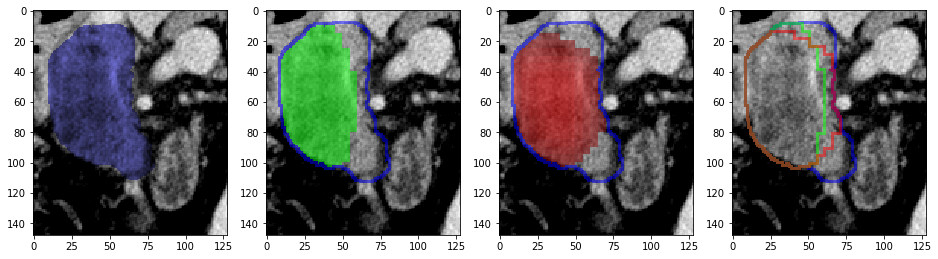

In [8]:
gt, pd = heatmap.heatmap(model,
            PANCREAS[0],
            LESION[0],
            (50, 50),
            (5, 5),
            is_padding=True,
            batch_size=128)
heatmap.draw_heatmap(IMG[0],
                    PANCREAS[0],
                    gt,
                    pd,
                    10,
                    0.5,
                    ismask=True,
                    alpha=0.5)